#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.02) Sampling Rate and Aliasing</font>

# <font color=red>Give it a Try!
# <font color=red>Part 3

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.02.G3) Spatial Sampling</font>

### <font color=red>DSP.02.G3.a) Spatial Sampling</font>

Run the code below.

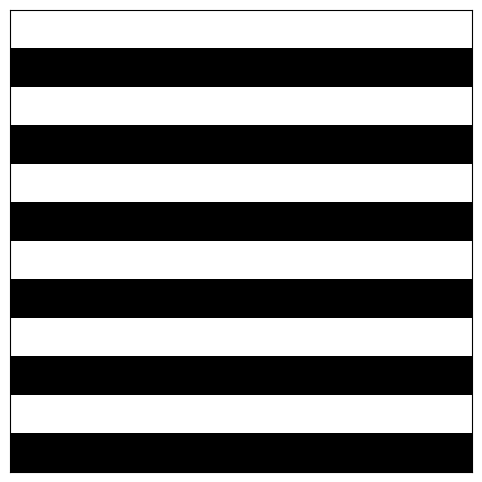

In [2]:
X = np.array([
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0]
])

make_imshow(X)
plt.show() 

If the unit of distance is 1 meter in the x and y direction, what is the frequency of this spatial pattern?

**Write answer here.**

### <font color=red>DSP.02.G3.b) Spatial Data</font>

If the unit of distance is 1 meter, what is the frequency of this next spatial pattern?

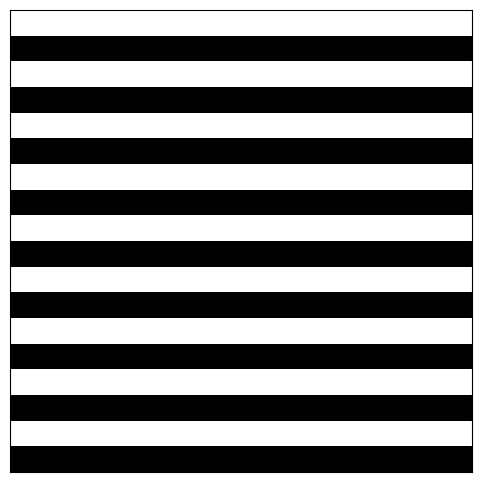

In [3]:
X = np.array([
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]   
])

make_imshow(X)
plt.show()  

**Write answer here.***

### <font color=red>DSP.02.G3.c) Spatial Data</font>

If the unit of distance is 1 meter in each direction, what is the frequency of this next spatial pattern?

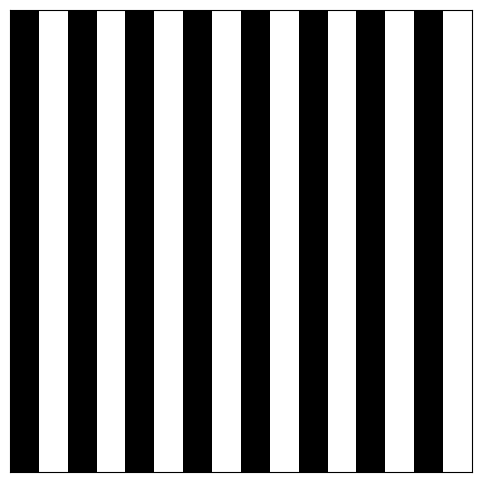

In [4]:
X = np.array([
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255],
    [0,255,0,255,0,255,0,255,0,255,0,255,0,255,0,255]
])

make_imshow(X)
plt.show() 

**Write answer here.**

### <font color=red>DSP.02.G3.d) Spatial Data</font>

The code below creates a spatial pattern with a frequency of 10 cycles per meter.

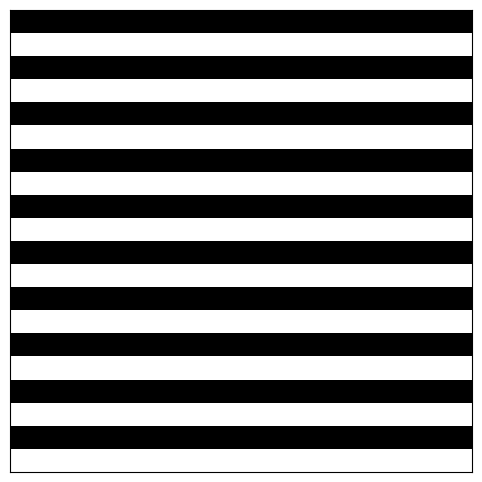

In [5]:
X = 255 * np.ones((100,100))
for r in range(10):
    X[r*10:r*10+5,:] = 0
    
make_imshow(X)
plt.show() 

This image is built from a 100 x 100 matrix, completing 10 cycles vertically.

The Nyquist-Shannon sampling theorem states that, for a series (vector) of discrete sample points to represent a continuous pattern adequately, the sample rate (fs in samples per second) must be more than twice the fastest frequency present. This requirement follows from the fact that only if samples are obtained at least twice per cycle can a discrete series accurately represent the frequency of a sine wave. This axiom is referred to as Nyquist's Rule, and one-half the sampling frequency is referred to as the Nyquist frequency. (As we reviewed in Lesson 2 Give It a Try Part 2, a sample rate exactly twice the frequency of a signal doesn't produce aliasing but may produce an odd timeseries of samples, even all zero if we sample at each zero-crossing. Generally, it's better to sample at more than twice the frequency of the signal, but technically sampling at exactly twice the frequency of the signal doesn't distort it, because there's no aliasing.)

Nyquist's Rule applies in distance or space as well as in time.

The plot above has a spatial frequency of 10 cycles per meter. The horizontal lines alternate between black and white 10 times. That is a spatial frequency of 10 cycles per meter.

If we wanted to sample this spatial plot (from top to bottom) without distortion, how often do we need to obtain a sample? 
**at least 20 samples per meter.**

Write some code to sample the above image using a 25 samples per meter sampling rate.

### <font color=red>DSP.02.G3.e) Spatial Data</font>

The code below creates a spatial pattern with a frequency of 20 cycles per meter.

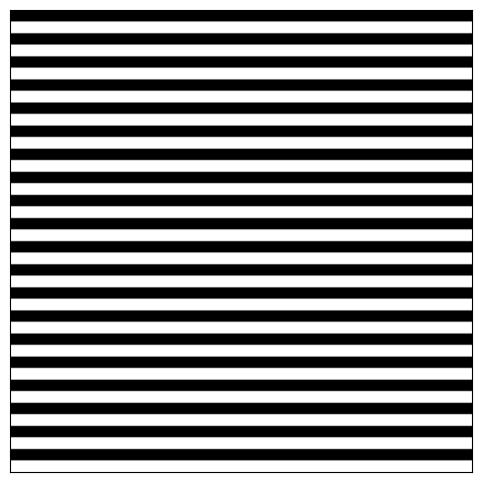

In [28]:
X = 255 * np.ones((200,200))
for r in range(20):
    X[r*10:r*10+5,:] = 0

make_imshow(X)
plt.show()

This image is built from a 200 x 200 matrix. Take a look at the values in this matrix.

In [29]:
X

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

The Nyquist-Shannon sampling theorem states that, for a series to represent a continuous pattern adequately, the sample rate (fs in samples per second) must be more than twice the fastest frequency present. This requirement follows from the fact that only if samples are obtained at least twice per cycle can a discrete series accurately represent the frequency of a sine wave. This axiom is referred to as Nyquist's Rule, and one-half the sampling frequency is referred to as the Nyquist frequency - the fastest frequency that the samples can represent without aliasing.

The plot above has a spatial frequency of 20 cycles per meter. The horizontal lines alternate between black and white 20 times across a 1 meter distance. That is a spatial frequency of 20 cycles per meter.

If we wanted to sample this spatial plot (from top to bottom) without distortion, how often do we need
to obtain a sample? **40 samples per meter.**

Write some code to sample the above image at 50 samples per meter.

### <font color=red>DSP.02.G3.f) Spatial Data</font>

The code below creates a spatial pattern with a frequency of 4 cycles per meter.

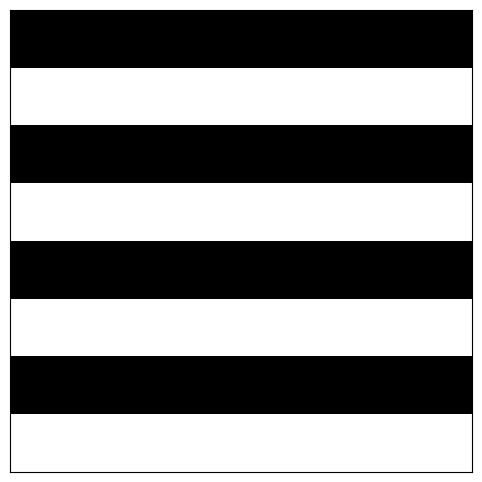

In [32]:
X = 255 * np.ones((64,64))
for r in range(8):
    X[r*16:r*16+8,:] = 0
    
make_imshow(X)
plt.show() 

This image is built from a 64 x 64 matrix. Take a look at the values in this matrix.

In [33]:
X

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

The Nyquist-Shannon sampling theorem states that for a series to represent a continuous pattern
adequately, the sample rate (in samples per second) must be more than twice the fastest frequency
present. This requirement follows from the fact that only if samples are obtained at least twice per
cycle can a discrete series accurately represent the frequency of a sine wave. This axiom is referred to
as Nyquist's Rule, and one-half the sampling frequency is referred to as the Nyquist frequency.

The plot above has a spatial frequency of 4 cycles per meter. The horizontal lines alternate between
black and white 4 times across 1 meter. That is a spatial frequency of 4 cycles per meter.

If we wanted to sample this spatial plot (from top to bottom) without distortion, how often do we need
to obtain a sample? **8 samples per meter.**

Write some code to sample the above image using a 11 samples per meter sampling rate.